# Load the dataframe

In [3]:
import pandas as pd
import matplotlib

In [4]:
df = pd.read_csv("data/data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [5]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [7]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [9]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [10]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

# Simple statistics and filtering

In [12]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

6.360787526128467

In [13]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

26.2

In [14]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

-28.8

<Axes: >

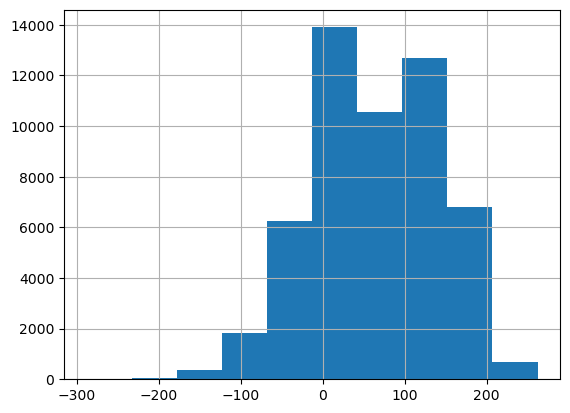

In [15]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [17]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [18]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [19]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG'].squeeze() / 10

3.1

In [20]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [21]:
df.loc[3, '   TG']

37

# Calculate a new column out of existing column

In [23]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [24]:
df["TG"] = df['TG0'] / 10

In [25]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG
0,1,35381,1860-01-01,21,0,21.0,2.1
1,1,35381,1860-01-02,46,0,46.0,4.6
2,1,35381,1860-01-03,31,0,31.0,3.1
3,1,35381,1860-01-04,37,0,37.0,3.7
4,1,35381,1860-01-05,31,0,31.0,3.1
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


In [26]:
df["Fahrenheit"] = df["TG"] * (9/5) + 32

In [27]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,35.78
1,1,35381,1860-01-02,46,0,46.0,4.6,40.28
2,1,35381,1860-01-03,31,0,31.0,3.1,37.58
3,1,35381,1860-01-04,37,0,37.0,3.7,38.66
4,1,35381,1860-01-05,31,0,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

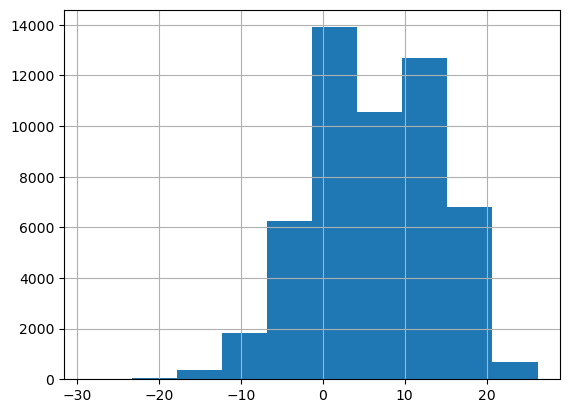

In [49]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

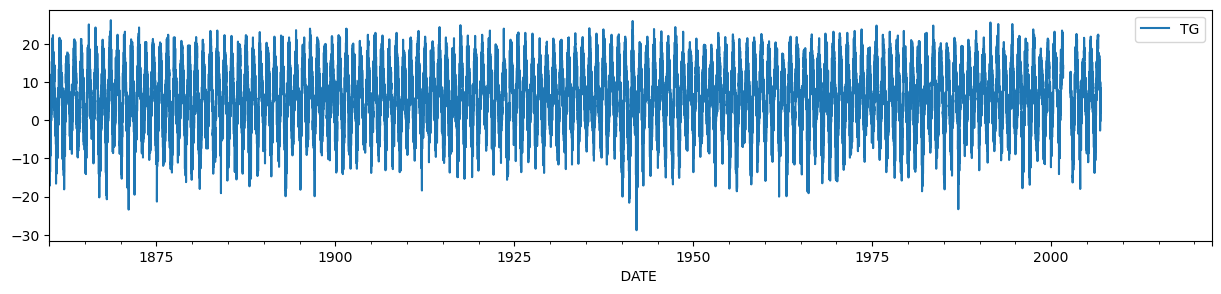

In [53]:
df.plot(x='    DATE', y="TG", figsize=(15, 3))